### importing libraries


In [81]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

### loading dataset

In [82]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [83]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [84]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

### data visualization

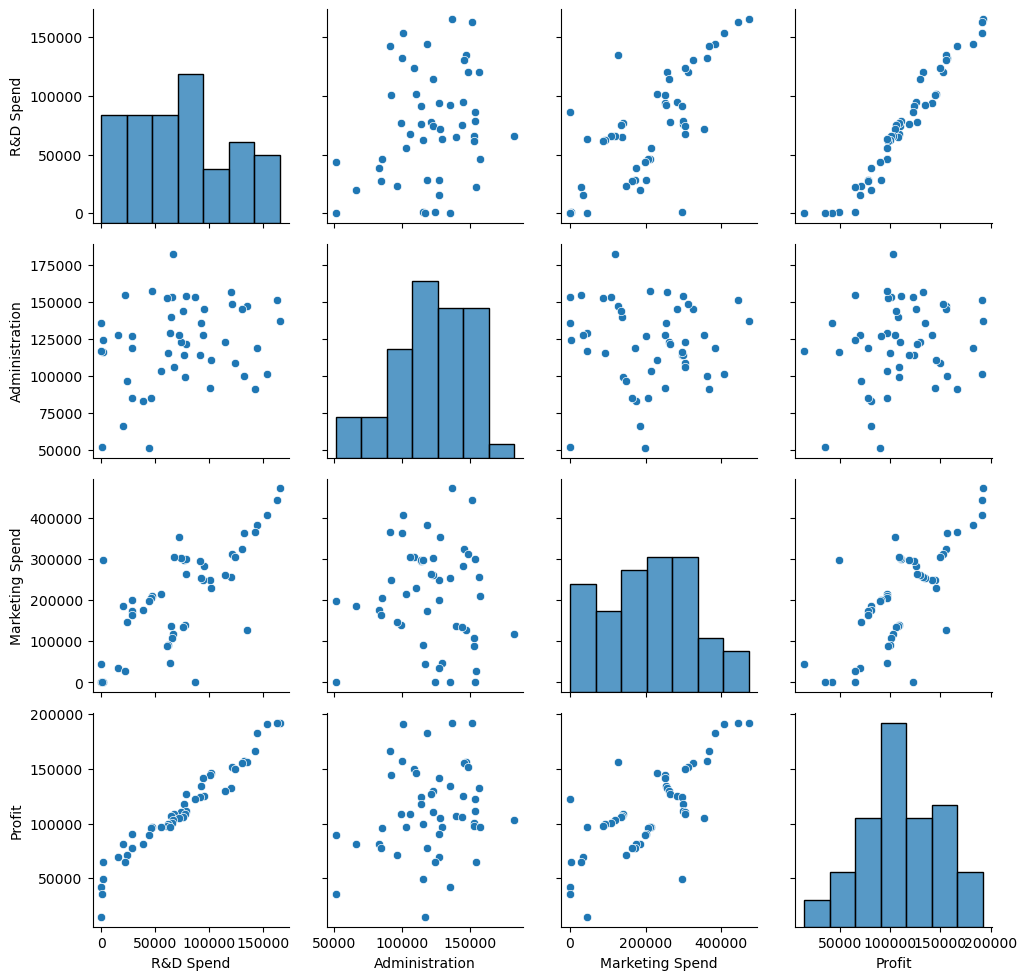

In [85]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### splitting data for training and testing

In [87]:
x_train, x_test, y_train, y_test = train_test_split(df[["R&D Spend","Administration","Marketing Spend"]],df.Profit, test_size = 0.2, random_state = 0)

### machine learning models

#### linear regression

In [88]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [90]:
model1.predict(x_test)

array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
       179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
       114756.11555221, 169064.01408795])

In [91]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [92]:
model1.score(x_test,y_test)

0.939395591782057

##### regression metrics

In [93]:
print(f"MAE : {mean_absolute_error(y_test,y1_predicted)}")
print(f"MSE : {mean_squared_error(y_test,y1_predicted)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y1_predicted))}")
print(f"r2_score : {r2_score(y_test,y1_predicted)}")

MAE : 7320.441614848132
MSE : 77506468.1688542
RMSE : 8803.775790469348
r2_score : 0.939395591782057


#### support vector machine

In [94]:
model2 = SVR()
model2.fit(x_train,y_train)

SVR()

In [95]:
y2_predicted = model2.predict(x_test)
y2_predicted

array([107977.98233613, 107989.02122828, 107987.58950462, 107978.10127598,
       107992.88736242, 107993.25287604, 107979.52588674, 107975.90652117,
       107992.08154889, 107993.90689813])

In [96]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [97]:
model2.score(x_test,y_test)

-0.15943042214297654

##### regression metrics

In [98]:
print(f"MAE : {mean_absolute_error(y_test,y2_predicted)}")
print(f"MSE : {mean_squared_error(y_test,y2_predicted)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y2_predicted))}")
print(f"r2_score : {r2_score(y_test,y2_predicted)}")

MAE : 29311.907235373557
MSE : 1482785819.5506663
RMSE : 38506.958066700965
r2_score : -0.15943042214297654


#### random forest regressor

In [131]:
model3 = RandomForestRegressor(n_estimators = 40)
model3.fit(x_train,y_train)

RandomForestRegressor(n_estimators=40)

In [132]:
y3_predicted = model3.predict(x_test)
y3_predicted

array([104159.67875, 135479.8585 , 136120.77975,  80387.98225,
       185215.72975, 115216.2845 ,  69455.82025,  99434.11525,
       113999.93625, 168308.978  ])

In [133]:
model3.score(x_test,y_test)

0.9622296853596785

##### regression metrics

In [154]:
print(f"MAE : {mean_absolute_error(y_test,y3_predicted)}")
print(f"MSE : {mean_squared_error(y_test,y3_predicted)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y3_predicted))}")
print(f"r2_score : {r2_score(y_test,y3_predicted)}")

MAE : 5778.231675000005
MSE : 48304137.85858847
RMSE : 6950.117830554275
r2_score : 0.9622296853596785


#### decision tree regressor

In [134]:
model4 = DecisionTreeRegressor()
model4.fit(x_train,y_train)

DecisionTreeRegressor()

In [135]:
y4_predicted = model4.predict(x_test)
y4_predicted

array([101004.64, 141585.52, 141585.52,  78239.91, 182901.99, 108733.99,
        71498.49,  99937.59, 108733.99, 182901.99])

In [136]:
model4.score(x_test,y_test)

0.9612107009064994

##### regression metrics

In [137]:
print(f"MAE : {mean_absolute_error(y_test,y4_predicted)}")
print(f"MSE : {mean_squared_error(y_test,y4_predicted)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y4_predicted))}")
print(f"r2_score : {r2_score(y_test,y4_predicted)}")

MAE : 5232.012000000004
MSE : 49607308.50916002
RMSE : 7043.245594834814
r2_score : 0.9612107009064994


#### KNN algorithm

In [138]:
model5 = KNeighborsRegressor()
model5.fit(x_train,y_train)

KNeighborsRegressor()

In [139]:
y5_predicted = model5.predict(x_test)
y5_predicted

array([114040.524, 131413.948, 125916.352,  83434.562, 175939.92 ,
       123955.812,  83434.562, 102301.59 , 117631.662, 159523.488])

In [140]:
model5.score(x_test,y_test)

0.8879039067653898

##### regression metrics

In [141]:
print(f"MAE : {mean_absolute_error(y_test,y5_predicted)}")
print(f"MSE : {mean_squared_error(y_test,y5_predicted)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y5_predicted))}")
print(f"r2_score : {r2_score(y_test,y5_predicted)}")

MAE : 10447.029400000007
MSE : 143358751.24623257
RMSE : 11973.251490143877
r2_score : 0.8879039067653898


#### lasso regression

In [142]:
model6 = Lasso(alpha = 50, max_iter = 100 , tol = 0.1)
model6.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [143]:
y6_predicted= model6.predict(x_test)
y6_predicted

array([103502.7490415 , 134062.34804891, 134801.76528254,  72179.67119156,
       181231.44319993, 113393.96926628,  66167.70625491,  98442.70642237,
       113723.46810171, 170835.06533358])

In [144]:
model6.score(x_test,y_test)

0.9459527153056828

##### regression metrics

In [145]:
print(f"MAE : {mean_absolute_error(y_test,y6_predicted)}")
print(f"MSE : {mean_squared_error(y_test,y6_predicted)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y6_predicted))}")
print(f"r2_score : {r2_score(y_test,y6_predicted)}")

MAE : 6960.021418760916
MSE : 69120618.02020639
RMSE : 8313.881044386333
r2_score : 0.9459527153056828


#### Ridge regression

In [146]:
model7 = Ridge(alpha = 50, max_iter = 100 , tol = 0.1)
model7.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [147]:
y7_predicted = model7.predict(x_test)
y7_predicted

array([103901.89698189, 132763.05989646, 133567.90366793,  72911.78978544,
       179627.92562927, 115166.64869364,  67113.57692876,  98154.80686147,
       114756.11557869, 169064.01404049])

In [148]:
model7.score(x_test,y_test)

0.9393955915736174

##### regression metrics

In [149]:
print(f"MAE : {mean_absolute_error(y_test,y7_predicted)}")
print(f"MSE : {mean_squared_error(y_test,y7_predicted)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y7_predicted))}")
print(f"r2_score : {r2_score(y_test,y7_predicted)}")

MAE : 7320.441624832953
MSE : 77506468.43542582
RMSE : 8803.775805608968
r2_score : 0.9393955915736174


#### elastic net regression

In [150]:
model8 = ElasticNet(alpha = 1.0 , l1_ratio=0.5)
model8.fit(x_train,y_train)

ElasticNet()

In [151]:
y8_predicted = model8.predict(x_test)
y8_predicted

array([103901.89692677, 132763.05995974, 133567.90371552,  72911.78979209,
       179627.92569221, 115166.64863221,  67113.57694233,  98154.80685067,
       114756.11554506, 169064.0141167 ])

In [152]:
model8.score(x_test,y_test)

0.9393955920212634

##### regression metrics

In [153]:
print(f"MAE : {mean_absolute_error(y_test,y8_predicted)}")
print(f"MSE : {mean_squared_error(y_test,y8_predicted)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y8_predicted))}")
print(f"r2_score : {r2_score(y_test,y8_predicted)}")

MAE : 7320.4415969519705
MSE : 77506467.86293505
RMSE : 8803.775773095032
r2_score : 0.9393955920212634


### finding best model

In [72]:
cross_val_score(model1,x_test,y_test)

array([ 0.93071643,  0.97846642,  0.95491307, -0.14294525,  0.82993801])

In [73]:
cross_val_score(model2,x_test,y_test)

array([-6.16805463e-01, -1.56675936e-02, -9.17599471e-01, -2.18021747e+01,
       -1.49388994e+00])

In [74]:
cross_val_score(model3,x_test,y_test)#best model #random forest regressor

array([0.9410809 , 0.78974553, 0.44819011, 0.69550334, 0.97417052])

In [75]:
cross_val_score(model4,x_test,y_test)#best model # decision tree regressor

array([0.95581556, 0.9934724 , 0.82529294, 0.65638695, 0.58513339])

In [76]:
cross_val_score(model5,x_test,y_test)

array([ -0.92134404,   0.03062494,  -0.18291002, -11.04216566,
        -0.02878125])

In [77]:
cross_val_score(model6,x_test,y_test)

array([ 0.92834301,  0.97507584,  0.94884597, -0.03147761,  0.85869431])

In [78]:
cross_val_score(model7,x_test,y_test)

array([ 0.93071644,  0.97846642,  0.95491307, -0.14294518,  0.82993802])

In [79]:
cross_val_score(model8,x_test,y_test)

array([ 0.93071644,  0.97846642,  0.95491307, -0.14294524,  0.82993802])